In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [2]:
df = sb.load_dataset("iris")
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
class KNN:
    def __init__(self,data,labels,k): # data = df.values labels=df[y].values
        self.data=data
        self.labels=labels
        self.ln = len(np.unique(labels))
        self.k=k
    def EuclideanDistance(self,x1,x2):
        result=0
        for i in range(len(x1)):
            result+= (x1[i]-x2[i])**2
        return result
    def predict(self,x):
        arr = [] 
        i=0
        for s in self.data:
            arr.append((self.EuclideanDistance(s,x),self.labels[i]))
            i+=1
        arr.sort(key=lambda a:a[0])
        count=np.zeros(self.ln)
        for i in range(self.k):
            count[arr[i][1][0]]+=1
        maxVal=0
        result=None
        for i in range(self.ln):
            if(count[i]>maxVal):
                result=i
                maxVal=count[i]
        return result
        

In [4]:
Xdf = df.drop(["species"],axis=1)
Ydf = df["species"]

le = LabelEncoder() 
Ydf = pd.DataFrame(le.fit_transform(Ydf))

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(Xdf, Ydf, random_state=42, stratify=Ydf, test_size=0.2)

In [6]:
accuracyVal=[] 
percentageTraining=[]
for i in range(10,len(X_train)+1,10):
    X = X_train.iloc[0:i,:]
    Y = Y_train.iloc[0:i] 
    knn = KNN(X.values, Y.values, 5)
    accuracy = []
    for j in range(len(X_test.values)):
        x=X_test.values[j]
        y_actual=Y_test.values[j]
        y_predicted=knn.predict(x)
        accuracy.append(y_actual==y_predicted)
    accuracyVal.append(np.mean(accuracy)) 
    percentageTraining.append(100*(i/len(X_train)))
accDF = pd.DataFrame({"accuracy":accuracyVal,"percentage":percentageTraining})
print(accDF)

    accuracy  percentage
0   0.766667    8.333333
1   0.933333   16.666667
2   0.966667   25.000000
3   0.900000   33.333333
4   0.900000   41.666667
5   0.933333   50.000000
6   0.966667   58.333333
7   0.933333   66.666667
8   0.966667   75.000000
9   0.966667   83.333333
10  0.966667   91.666667
11  1.000000  100.000000


<Axes: xlabel='percentage', ylabel='accuracy'>

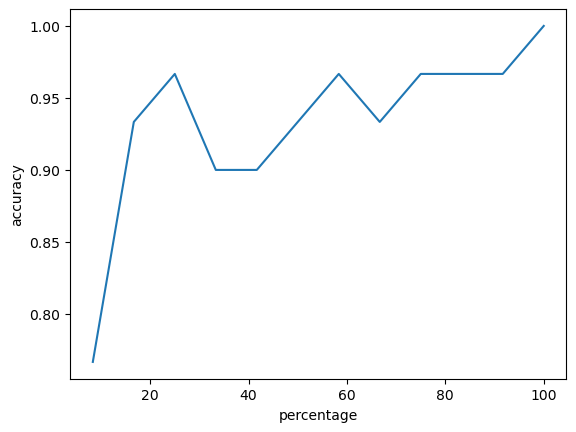

In [7]:
sb.lineplot(data=accDF, x="percentage",y="accuracy")

In [125]:
knn = KNN(X_train.values, Y_train.values, 5)
for i in range(len(X_test.values)):
    x=X_test.values[i]
    y_actual=Y_test.values[i]
    y_predicted=knn.predict(x)
    print(y_actual[0],y_predicted)

0 0
2 2
1 1
1 1
0 0
1 1
0 0
0 0
2 2
1 1
2 2
2 2
2 2
1 1
0 0
0 0
0 0
1 1
1 1
2 2
0 0
2 2
1 1
2 2
2 2
1 1
1 1
0 0
2 2
0 0
